In [129]:
import math
import random
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##### **Binomial Distribution**

In [3]:

def pmf_binom(n, k, p):
    return math.comb(n, k) * (p ** k) * ((1-p) ** (n-k))

In [4]:
n = 10
k = 4
p = 0.5

# exactly 4 heads out of 10 tossed
pmf_binom(n, k, p)

0.205078125

In [5]:
stats.binom.pmf(k=k, n=n, p=p)

0.2050781249999999

In [6]:
# at least 2 heads
1 - (pmf_binom(n=n, k=0, p=p) + pmf_binom(n=n, k=1, p=p))

0.9892578125

In [10]:
1 - stats.binom.cdf(n=n, k=1, p=p)

0.9892578125

In [11]:
# almost 5 heads
stats.binom.cdf(n=n, k=5, p=p)

0.623046875

##### **Simulate Binomial Random Variables**

In [29]:

# Write a function that simulates the outcome of a binomial random variable for given n (number of trials) and p (probability of success)
# Expected Solution: Use a random number generator to simulate n Bernoulli trials and count the number of successes.

def simulate_binomial_distn(n, p):
    success = 0
    for _ in range(n):
        if random.random() <= p:
            success += 1
    return success


binom_rvs = []

for _ in range(30):
    
    binom_rvs.append(simulate_binomial_distn(
            n=1000,
            p=0.45
        ))

binom_rvs = np.array(binom_rvs)
np.mean(binom_rvs)

450.1333333333333

In [31]:
# binomial random variables
binom_rvs = stats.binom.rvs(n=1000, p=0.45, size=30)
np.mean(binom_rvs)

452.43333333333334

##### **Poisson Distribution**

In [32]:
# probability of observing exactly 2 events

lmbda = 3
k = 2

stats.poisson.pmf(k, lmbda)

0.22404180765538775

In [42]:
poisson_rvs = stats.poisson.rvs(lmbda, size=100)
np.mean(poisson_rvs)

3.05

##### **Geometric Distribution**

In [43]:

def pmf_geometric_distn(p, k):
    return ((1-p) ** (k-1)) * p

In [44]:
# probability of getting 6 in the 6-th trial when a fair dice is tossed

p = 1 / 6
k = 6

pmf_geometric_distn(p, k)

0.06697959533607684

In [45]:
stats.geom.pmf(k, p)

0.06697959533607684

In [55]:
geom_rvs = stats.geom.rvs(p, size=100)
np.mean(geom_rvs)

5.77

##### **Simulate Geometric Distribution**

In [80]:

def simulate_geometric_distn(p):
    trials = 0
    while True:
        trials += 1
        
        if random.random() <= p:
            break
    return trials

# simulate to get the first 6 from rolling a fair die
simulate_geometric_distn(
    p=1/6
)

5

In [81]:
geom_rvs = []
for _ in range(300):
    geom_rvs.append(simulate_geometric_distn(p=1/6))

geom_rvs = np.array(geom_rvs)
np.mean(geom_rvs)

5.476666666666667

In [124]:
# what is the expected number of coin flip to get a head? show it using simulation.

def simulate_geometric_distn(p):
    trials = 0
    while True:
        trials += 1
        
        if random.random() <= p:
            break
    return trials

def simulate_expected_number_of_coin_flip(n_trials, p=1/2):
    total_flips = 0
    for _ in range(n_trials):
        total_flips += simulate_geometric_distn(p)
        
    return total_flips / n_trials  

simulate_expected_number_of_coin_flip(
    n_trials=10000,
    p=0.5
)

2.01

##### **Normal Distribution**

In [133]:
# Write a Python function to generate a random sample from a normal distribution.
# mu = 50; std = 4

normal_rvs = np.random.normal(loc=50, scale=6, size=1000)
normal_rvs[:10]

array([51.70184056, 40.21097581, 61.54981298, 52.38871992, 43.21515784,
       48.67511253, 48.95091763, 44.00594843, 62.48637568, 47.39425178])

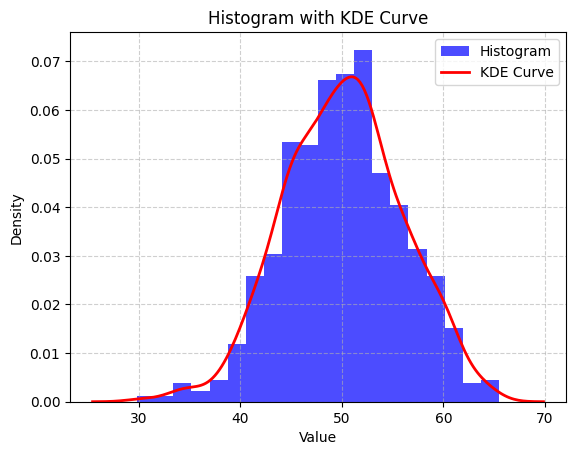

In [134]:
# Plot histogram
plt.hist(normal_rvs, bins=20, density=True, alpha=0.7, color='blue', label="Histogram")

# Add KDE curve
sns.kdeplot(normal_rvs, color='red', label="KDE Curve", linewidth=2)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add labels and title
plt.title("Histogram with KDE Curve")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()  # Add legend to distinguish histogram and KDE
plt.show()

In [136]:
# How would you calculate the probability that a value falls within a certain range in a normal distribution?
# P(70 <= X <= 80); mu=75, std=5

mu = 75
std = 5

p_70 = stats.norm.cdf(70, loc=mu, scale=std)
p_80 = stats.norm.cdf(80, loc=mu, scale=std)

# Probability that 70 <= X <= 80
p_range = p_80 - p_70

print(f"P(70 <= X <= 80): {p_range:.4f}")

P(70 <= X <= 80): 0.6827


In [140]:
# Suppose the heights of people are normally distributed with a mean of 170 cm and a standard deviation of 10 cm. 
# What percentage of people are taller than 180 cm?  P (X > 180)

mu = 170
std = 10

# Calculate P(X > 180)
prob_taller_180 = 1 - stats.norm.cdf(180, loc=mu, scale=std)
prob_taller_180

0.15865525393145707

In [141]:
# A factory produces light bulbs, and their lifespans are normally distributed with 𝜇 = 1200 and σ=200 hours. 
# What proportion of the bulbs last less than 1000 hours? P(X < 1000)

mu = 1200
std = 200

prob_less_than_1000 = stats.norm.cdf(1000, loc=mu, scale=std)
prob_less_than_1000

0.15865525393145707

In [ ]:
# How can you interpret confidence intervals in the context of a normal distribution?
# Example: 95% confidence interval for a population mean.

